## テストデータの評価方法に関して
* confusion matrixに関して
→混同行列を強いようして機械学習モデルの正確性を図ると言うもの
→2値分類の性能評価をする場合に使用する
→これらは状況によって評価するものを変えていく必要がある。例えば、癌であるかどうかを調べる際には取りこぼしを減らしていきたいので「再現率」の指標を重視する必要がある。よって様々な状況により使用する指標というのは変わってくるので適宜評価指標をどれにするのかを考える必要がある。
→それぞれの指標でF値を確認する必要がある。各クラスの値のリコールを上げるのは簡単。（なぜなら全てを０と予測するモデルを作成すれば良いことになるから。）
→F値は再現率と適合率の調和平均で両方とものスコアが良いとF値も良い。(それぞれのクラスごとにF値は算出する事ができる。)
→https://aiacademy.jp/texts/show/?id=34
→TP(True positive)：モデルが「Positive」と予想して、実際に「Positive」だった場合
→TN(True negative):モデルが「Negative」と予想して、実際に「Negative」だった場合
→FP(False positive):モデルが「Positive」と予想したが、実際には「Negative」だった場合
→FN(False negative):モデルが「Negative」と予想したが、実際には「Positive」だった場合
→https://vector-ium.com/ds-confusion/
→https://qiita.com/TsutomuNakamura/items/a1a6a02cb9bb0dcbb37f


* ROC,AUCに関して
→閾値を変えていってFPR・TPRのデータをプロットしたグラフ
→AUCが大きければ大きいほど良い分類がうまくいっている。(ROC曲線の下の部分の面積のことを指している。)
→各正解データのクラス内総データ数をもとに計算されるため、クラス間のデータ数の偏りによる影響がないという特徴を持っている。
→https://qiita.com/TsutomuNakamura/items/ef963381e5d2768791d4
→https://blog.kikagaku.co.jp/roc-auc

In [1]:
import numpy as np

from sklearn.datasets import load_breast_cancer

data = load_breast_cancer()

X = data.data
y = data.target

from sklearn.model_selection import ShuffleSplit
ss = ShuffleSplit(n_splits=1, 
                  train_size=0.8, 
                  test_size=0.2, 
                  random_state=0)

train_index, test_index = next(ss.split(X, y))

X_train, X_test = X[train_index], X[test_index]
y_train, y_test = y[train_index], y[test_index]

In [2]:
from sklearn import linear_model
clf = linear_model.LogisticRegression(solver='liblinear')
# 学習の実施
clf.fit(X_train, y_train)
# テストスコアの算出
clf.score(X_test, y_test)

0.956140350877193

### 混同行列に関して

In [3]:
# 混同行列の作成
y_pred = clf.predict(X_test)
conf_mat = np.zeros([2,2])

for true_label , est_label in zip(y_test , y_pred):
    conf_mat[true_label , est_label] += 1

In [4]:
# 混同行列の結果
print(conf_mat)

[[46.  1.]
 [ 4. 63.]]


In [7]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
# 正解率
print("正解率の算出")
print(accuracy_score(y_test , y_pred))
print()
print("混同行列の算出")
cmat = confusion_matrix(y_test , y_pred)
print(confusion_matrix(y_test , y_pred))

正解率の算出
0.956140350877193

混同行列の算出
[[46  1]
 [ 4 63]]


In [8]:
tp = cmat[0,0]
tn = cmat[1,1]
fp = cmat[1,0]
fn = cmat[0,1]

In [13]:
from sklearn.metrics import classification_report
# 一気に混同行列の結果を確認したい時
print(classification_report(y_test , y_pred , digits = 4))

              precision    recall  f1-score   support

           0     0.9200    0.9787    0.9485        47
           1     0.9844    0.9403    0.9618        67

    accuracy                         0.9561       114
   macro avg     0.9522    0.9595    0.9551       114
weighted avg     0.9578    0.9561    0.9563       114



In [14]:
# 再現率(検出したい箇所のリコールを確認すると良い。今回はクラス０の検出を見たいのでこのような形にしている。)
tp / (tp + fn)

0.9787234042553191

In [16]:
# 精度・適合率(precision)今回はクラス０の検出を見たいのでこのような形にしている。
tp / (tp + fp)

0.92

## ROC、AUCに関して

In [18]:

from sklearn.metrics import roc_curve, auc, average_precision_score, precision_recall_curve

import matplotlib.pyplot as plt
%matplotlib inline

AUC =  0.9942838996506828


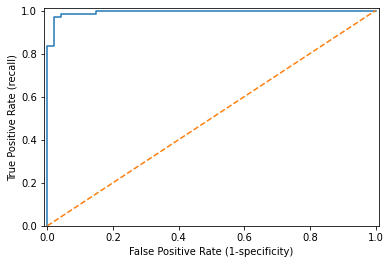

In [21]:
test_score = clf.decision_function(X_test)
fpr , tpr , _ = roc_curve(y_test , test_score)

plt.plot(fpr , tpr)
print("AUC = " , auc(fpr , tpr))

plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlim([-0.01, 1.01])
plt.ylim([0.0, 1.01])
plt.ylabel('True Positive Rate (recall)')
plt.xlabel('False Positive Rate (1-specificity)');